1. [Dataset Description](README.md)
2.  <a href="#asses">Data Assessing</a>
3.  <a href="#clean">Data Cleaning</a>
    - <a href="#rename">Renaming Columns</a>
    - <a href="#dtype">Renaming Columns</a>
    - <a href="#insert">Renaming Columns</a>
    - <a href="#describe">Exploring the charcteristics of _"age"_ and _"date_diff"_</a>
4.  <a href="#explore">Data Exploring</a>
# Dataset Description:
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.* ***Patientid :*** The identification number of the patient.
* ***AppointmentID:*** The identification number of the appointment _"Key Identifier"_.
* ***Gender:*** _"M"_ for Male, and _"F"_ for Female.
* ***ScheduleDay:*** Tells us on what day the patient set up their appointment.
* ***Age:*** The patient's age.
* ***Neighbourhood:*** Indicates the location of the hospital
* ***Scholaeship:*** Indicates whether or not the patient is enro in Brasilian welfare program [Bolsa Família](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1724087817860577&usg=AOvVaw2Q_qcF1o_XPTswzKDAbl1Q) .Where, _Enrolled = 1_ and _Not Enroled = 0_.
* ***Hipertension (HTN):*** Patients with high blood pressure. Where, _True = 1_ and _False = 0_.
* ***Diabetes (DM):*** Patients with high blood sugar levels. Where, _True = 1_ and _False = 0_.
* ***Alcoholism (AUD):*** Alcohol use disorder. Where, _True = 1_ and _False = 0_.
* ***Handicap (HCP):*** an illness, injury, or condition that makes it difficult for someone to do some things that other people do. Where, _True = [1,2,3,4]_ and _False = 0_.
* ***SMS_received:*** 1 or more messages sent to the patient. Where, _True = 1_ and _False = 0_.
* ***No-show:*** _"No"_ if the patient showed up to their appointment,and _"Yes"_ if they did not show up.



In [7]:
# Importing Liberaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='asses'></a>
## 1- Data Assessing:

In [9]:
# Exploring data characteristics of the dataset:
df= pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
print('The dataset has a shape of:',df.shape)

The dataset has a shape of: (110527, 14)


In [12]:
if df.isna().sum().sum()== 0:
    print ('No NULL values in this dataset')
else:
    print('Total number of Null Values is: ',df.isna().sum().sum())

No NULL values in this dataset


In [13]:
if df.duplicated().sum()== 0:
    print ('No DUPLICATED values in this dataset')
else:
    print('Total number of Duplicated Values is: ',df.duplicated().sum())

No DUPLICATED values in this dataset


In [14]:
print('The number of UNIQUE values in this dataset:\n\n',df.nunique())

The number of UNIQUE values in this dataset:

 PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [15]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
print('"Gender" Categories:        ',df.Gender.unique())
print('\n"Scolarship" Categories:    ', df.Scholarship.unique())
print('\n"Hipertension" Category:    ', df.Hipertension.unique())
print('\n"Diabetes" Category:        ', df.Diabetes.unique())
print('\n"Alcoholism" Category:      ', df.Alcoholism.unique())
print('\n"Handcap" Category:         ', df.Handcap.unique())
print('\n"SMS_received" Category:    ', df['SMS_received'].unique())
print('\n"No-show" Category:         ', df['No-show'].unique())

"Gender" Categories:         ['F' 'M']

"Scolarship" Categories:     [0 1]

"Hipertension" Category:     [1 0]

"Diabetes" Category:         [0 1]

"Alcoholism" Category:       [0 1]

"Handcap" Category:          [0 1 2 3 4]

"SMS_received" Category:     [0 1]

"No-show" Category:          ['No' 'Yes']


In [17]:
#The describtive statistics for the whole dataset:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='clean'></a>
## 2 - Data Cleaning:

<a id='rename'></a>
### a) Renaming Column labels:
   
In order to investigate easily the columns  label nees to be changedas follows:
   * _PatientId_          to     ***patient_id***
   * _AppointmentID_      to     ***appoint_id***
   * _Gender_             to     ***gender***
   * _ScheduledDay_       to     ***sched_day***
   * _AppointmentDay_     to     ***appoint_day***
   * _Age_                to     ***age***
   * _Neighbourhood_      to     ***neighbourhood***
   * _Scholarship_        to     ***scholarship***
   * _Hipertension_       to     ***htn***
   * _Diabetes_           to     ***dm***
   * _Alcoholism_         to     ***aud***
   * _Handcap_            to     ***hcp***
   * _SMS_received_       to     ***sms_received***
   * _No-show_            to     ***no_show***


In [20]:
# Renaming the dataset columns:
df = df.rename(columns = {"PatientId":"patient_id", "AppointmentID":"appoint_id", 'Gender':"gender","ScheduledDay":"sched_day",
                           "AppointmentDay":"appoint_day","Age":"age", "Neighbourhood":"neighbourhood", "Scholarship":"scholarship",
                           "Hipertension":"htn", "Diabetes":"dm", "Alcoholism":"aud","Handcap":"hcp", "SMS_received":"sms_received","No-show":"no_show"})
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='dtype'></a>
### b) Changing the data types of:
- _patient_id_ to ***integer***
- _sched_day_ & _appoint_day_ to ***date format***

In [22]:
# Changing the data types:
df['patient_id'] = df['patient_id'].astype('int64')
df['sched_day'] = pd.to_datetime(df['sched_day']).dt.date
df['appoint_day'] = pd.to_datetime(df['appoint_day']).dt.date
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     110527 non-null  int64 
 1   appoint_id     110527 non-null  int64 
 2   gender         110527 non-null  object
 3   sched_day      110527 non-null  object
 4   appoint_day    110527 non-null  object
 5   age            110527 non-null  int64 
 6   neighbourhood  110527 non-null  object
 7   scholarship    110527 non-null  int64 
 8   htn            110527 non-null  int64 
 9   dm             110527 non-null  int64 
 10  aud            110527 non-null  int64 
 11  hcp            110527 non-null  int64 
 12  sms_received   110527 non-null  int64 
 13  no_show        110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


<a id='insert'></a>
### c) Inserting New Columns in the dataset:
- ***date_diff:*** To measure the difference in days between  _The Schedule Date_ and _The Appointment Date_.
- ***age_stages:*** groupping the _age_ column according to the different stages of human life, as follows:
    - **child:** Ages from _0_ to _12_
    - **teenage:** Ages greater than _12_ to _21_
    - **adult:** Ages greater than _21_ to _40_
    - **middle_age:** Ages greater than _40_ to _65_
    - **elderly:** Ages greater than _65_
  


In [25]:
# Inserting the "date_diff" column:
df['date_diff']= (df['appoint_day']- df['sched_day']).dt.days
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,date_diff
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [26]:
# relocating the "date_diff" column to be in the 5th column:
df.insert(5,'date_diff',df.pop('date_diff'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [27]:
# Inserting the "age_stages" column:
df['age_stages']= ['child' if x <= 12
                   else 'teenage' if 12 < x <= 21
                   else 'adult' if 21 < x <= 40
                   else 'middle_aged' if 40 < x <= 65
                   else 'elderly' for x in df['age']]
df.head()

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show,age_stages
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,middle_aged
1,558997776694438,5642503,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No,middle_aged
2,4262962299951,5642549,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,No,middle_aged
3,867951213174,5642828,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,8841186448183,5642494,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No,middle_aged


In [28]:
# relocating the "age_stages" column to be in the 6th column:
df.insert(6,'age_stages',df.pop('age_stages'))
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='describe'></a>
### d) Exploring the charcteristics of _"date_diff"_,_"age_stages"_, and _"age"_  :


#### 1. ***date_diff:*** 
- Applying descriptive statistics for further investigation.
- ***Note:***
     - The **sched_day** should occur before the **appoint_day** (_i.e.,_ appoint_day > sched_day)
     



In [270]:
# Exploring date_diff column:
df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'}).style.format({'amount':'{:,.0f}'})

,stat,amount
0,count,"110,527"
1,mean,10
2,std,15
3,min,0
4,25%,0
5,50%,4
6,75%,15
7,max,179


In [32]:
# Determining the dates where the schedule dates were after the appointment dates:
df.query('date_diff<0').iloc[:,3:6]

,sched_day,appoint_day,date_diff
27033,2016-05-10,2016-05-09,-1
55226,2016-05-18,2016-05-17,-1
64175,2016-05-05,2016-05-04,-1
71533,2016-05-11,2016-05-05,-6
72362,2016-05-04,2016-05-03,-1


In [268]:
# Adjusting those appointment dates to be the same as the schedule dates:
df['appoint_day']=np.where(df['appoint_day']<df['sched_day'],df['sched_day'],df['appoint_day'])
df['date_diff']= (df['appoint_day']- df['sched_day']).dt.days
time_stats=df.date_diff.describe().reset_index().rename(columns={'index':'stat','date_diff': 'amount'}).style.format({'amount':'{:,.0f}'})
time_stats

,stat,amount
0,count,"110,527"
1,mean,10
2,std,15
3,min,0
4,25%,0
5,50%,4
6,75%,15
7,max,179


In [34]:
print(f'The most frequent date diff is {df.date_diff.value_counts().idxmax()} day(s)')

The most frequent date diff is 0 day(s)


#### 2. ***age_stages:*** 
- Checking if a patient’s ID is repeated across two categories instead of just one.
- ***Note:***
  - Sometimes, due to the time span of the dataset, a patient’s age may shift between categories. For instance, if a patient was initially recorded as 12 years old (categorized as a child), and later, after a considerable time gap, is recorded as 13 (categorized as a teenager).


In [36]:
# The number of patients (Unique):
patient_count=df.patient_id.nunique()
print(f'The Total Number of Patients is {patient_count} Patients\n')

# The number of patients when classified into categories (Unique):
patient_count_category=df.groupby('age_stages').patient_id.nunique().sum()
print(f'The Total Number of Patients (when categorized) is {patient_count_category} Patients\n')

# The number of Patients that are repeated in 2 categories:
print(f'The Difference = {patient_count_category - patient_count} Patients')

The Total Number of Patients is 62299 Patients

The Total Number of Patients (when categorized) is 62352 Patients

The Difference = 53 Patients


In [37]:
# Determining the number of patients that are recorded in two categories: 
c_patient = df.query('age_stages == "child"').patient_id.unique() 
t_patient= df.query('age_stages=="teenage"').patient_id.unique()
a_patient = df.query('age_stages == "adult"').patient_id.unique()  
m_patient= df.query('age_stages=="middle_aged"').patient_id.unique()
e_patient = df.query('age_stages == "elderly"').patient_id.unique()  

repeated_1 = set(c_patient).intersection(t_patient)
repeated_2 = set(t_patient).intersection(a_patient)
repeated_3 = set(a_patient).intersection(m_patient)
repeated_4 = set(m_patient).intersection(e_patient)

print(f'''repeated patients number:\n\n -Child & Teenage = {len(repeated_1)} Patients\n -Teenage & Adult = {len(repeated_2)} Patients
 - Adult & Middle Aged = {len(repeated_3)} Patients \n - Middle_aged & Elderly = {len(repeated_4)} Patients''')

repeated patients number:

 -Child & Teenage = 12 Patients
 -Teenage & Adult = 16 Patients
 - Adult & Middle Aged = 13 Patients 
 - Middle_aged & Elderly = 12 Patients


In [38]:
# Replacing the category of repeated patients to be the same as recorded at the begining:
# (Sine the change in age was 1 year)
df.loc[df['patient_id'].isin(repeated_1), 'age_stages'] = 'child'
df.loc[df['patient_id'].isin(repeated_2), 'age_stages'] = 'teenage'
df.loc[df['patient_id'].isin(repeated_3), 'age_stages'] = 'adult'
df.loc[df['patient_id'].isin(repeated_4), 'age_stages'] = 'middle_aged'

In [39]:
# The amended number of patients when classified into categories (Unique):
patient_count_category=df.groupby('age_stages').patient_id.nunique().sum()
print(f'The Total Number of Patients (when categorized) is {patient_count_category} Patients')

The Total Number of Patients (when categorized) is 62299 Patients


#### 3. ***age:*** 
- Investigating the cause of negative values that appeared in the minimum value during descriptive statistics.
- ***Note:***
  -   Since the data type for age is an integer, ages less than one year ***(in months)*** are recorded as **0** years

In [276]:
# Descriptive statistics for age:
df.age.describe().reset_index().style.format({'age':'{:,.0f}'})

,index,age
0,count,"110,527"
1,mean,37
2,std,23
3,min,0
4,25%,18
5,50%,37
6,75%,55
7,max,115


In [42]:
df.query("age < 0")

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,0,child,-1,ROMÃO,0,0,0,0,0,0,No


In [43]:
# replacing the value of -1 years with 1:
df.age= np.where(df.age< 0,1,df.age)

In [279]:
df.age.describe().reset_index().style.format({'age':'{:,.0f}'})

,index,age
0,count,"110,527"
1,mean,37
2,std,23
3,min,0
4,25%,18
5,50%,37
6,75%,55
7,max,115


In [45]:
# Exploring the charcteristics of the amended dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   patient_id     110527 non-null  int64 
 1   appoint_id     110527 non-null  int64 
 2   gender         110527 non-null  object
 3   sched_day      110527 non-null  object
 4   appoint_day    110527 non-null  object
 5   date_diff      110527 non-null  int64 
 6   age_stages     110527 non-null  object
 7   age            110527 non-null  int64 
 8   neighbourhood  110527 non-null  object
 9   scholarship    110527 non-null  int64 
 10  htn            110527 non-null  int64 
 11  dm             110527 non-null  int64 
 12  aud            110527 non-null  int64 
 13  hcp            110527 non-null  int64 
 14  sms_received   110527 non-null  int64 
 15  no_show        110527 non-null  object
dtypes: int64(10), object(6)
memory usage: 13.5+ MB


<a id='explore'></a>
## 2 - Data Exploring:

In [47]:
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [48]:
# Exploring Gender Column:
df.groupby('gender').patient_id.nunique().reset_index().rename(columns={'index':'gender','pacient_id':'count'}).style.hide()


gender,patient_id
F,40046
M,22253


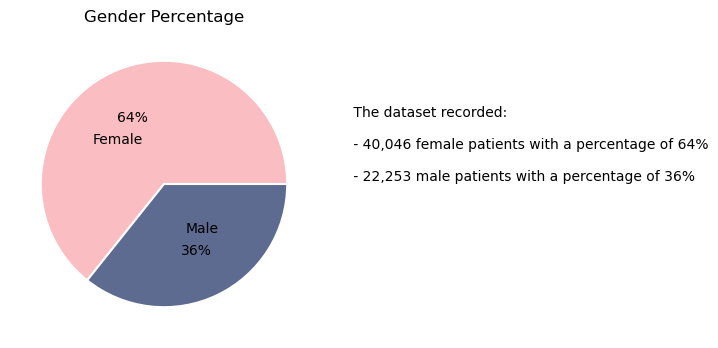

In [49]:
x=df.groupby('gender').patient_id.nunique()
label = 'Female','Male'
text = ''' The dataset recorded:\n\n - 40,046 female patients with a percentage of 64%\n
 - 22,253 male patients with a percentage of 36%'''
plt.subplots(figsize = (4,4))
plt.pie(x, labels=label, colors= ['#f9bdc2','#5e6b91'], autopct='%1.0f%%',labeldistance=.4, wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Gender Percentage')
plt.text(1.5,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');


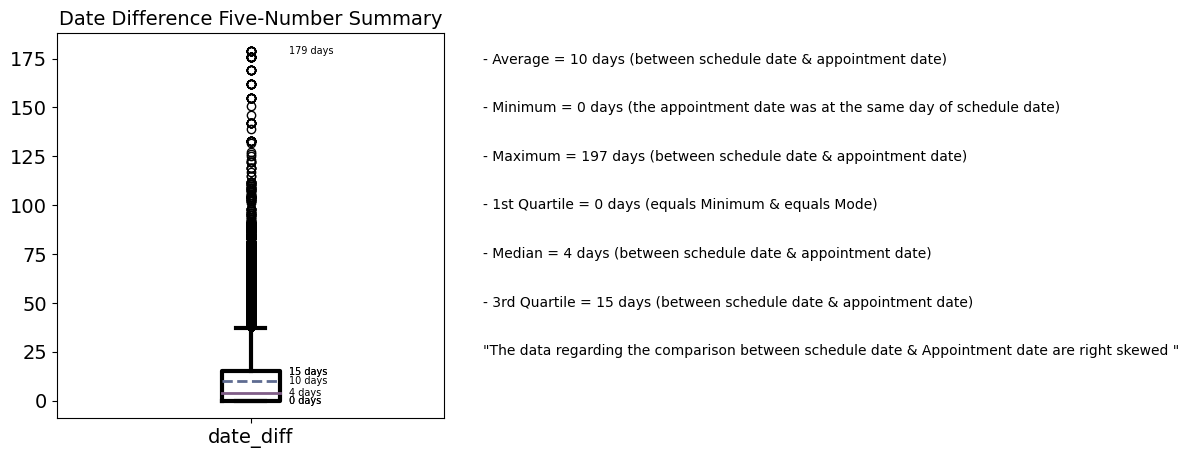

In [50]:
# Exploring the date_diff:
x= df.date_diff
notes= '''- Average = 10 days (between schedule date & appointment date)\n\n
- Minimum = 0 days (the appointment date was at the same day of schedule date)\n\n
- Maximum = 197 days (between schedule date & appointment date)\n\n
- 1st Quartile = 0 days (equals Minimum & equals Mode)\n\n
- Median = 4 days (between schedule date & appointment date)\n\n
- 3rd Quartile = 15 days (between schedule date & appointment date)\n\n
"The data regarding the comparison between schedule date & Appointment date are right skewed "'''
plt.subplots(figsize = (5,5))
plt.boxplot( x,showmeans = True, meanline  = True,showcaps = True,medianprops={ "color" : "#805d87","linewidth": 2},
            boxprops={"color":"black","linewidth": 3},whiskerprops={"color": "black", "linewidth": 3},
            capprops={"color": "black", "linewidth": 3},meanprops = {"color": "#5e6b91","linewidth": 2 })
for i, v in enumerate(time_stats.iloc[1:,1]):
  plt.text(1.1,v, f'{v:.0f} days', ha='left', va='center',fontsize=7)
plt.title('Date Difference Five-Number Summary', fontsize = 14)
plt.xticks([1],['date_diff'], fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(1.6,100,notes,ha='left',va='center',fontsize = 10, weight = 'normal');

In [51]:
# Exploring age_stages column:
# Category Count:
age_stage_count=df.groupby(['age_stages']).patient_id.nunique().reset_index().rename(columns={"patient_id":"count"})
age_stage_count.sort_values('count').style.hide()


age_stages,count
teenage,6962
elderly,7711
child,12675
adult,14897
middle_aged,20054


In [262]:
# Calculating age averages of each category:
avg_age=df.groupby('age_stages').age.mean().reset_index().rename(columns={'age':'avg_age'})
avg_age.sort_values('avg_age').style.hide().format({'avg_age':'{:,.2f}'})

age_stages,avg_age
child,4.98
teenage,17.27
adult,31.29
middle_aged,52.91
elderly,74.73


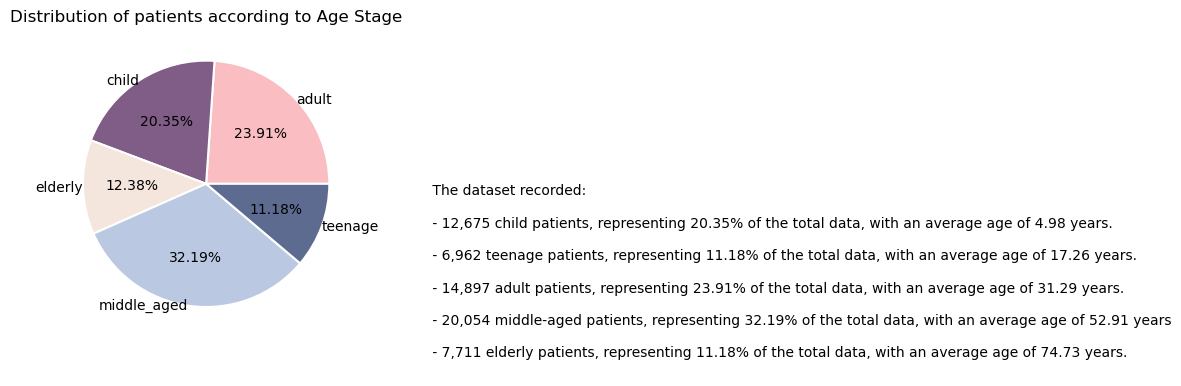

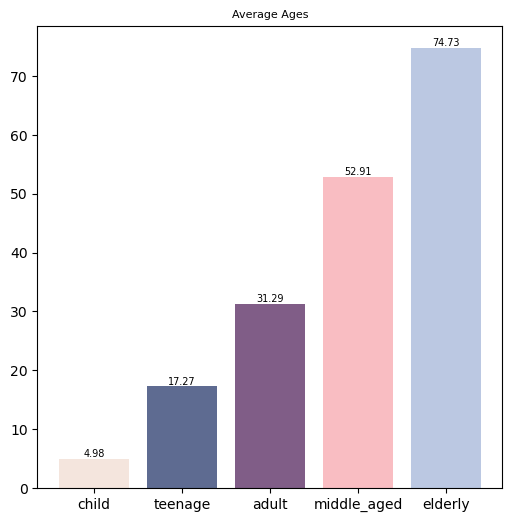

In [53]:
# Exploring Counts & Averages of age_stages by visualization:

notes = ''' The dataset recorded:\n\n - 12,675 child patients, representing 20.35% of the total data, with an average age of 4.98 years.\n
 - 6,962 teenage patients, representing 11.18% of the total data, with an average age of 17.26 years.\n
 - 14,897 adult patients, representing 23.91% of the total data, with an average age of 31.29 years.\n
 - 20,054 middle-aged patients, representing 32.19% of the total data, with an average age of 52.91 years\n
 - 7,711 elderly patients, representing 11.18% of the total data, with an average age of 74.73 years.\n'''

x=df.groupby(['age_stages']).patient_id.nunique()
plt.subplots(figsize = (4,4))
plt.pie(x,labels = age_stage_count.age_stages,  colors= ['#f9bdc2','#805d87','#f4e5dd','#bbc8e2','#5e6b91'], autopct='%1.2f%%',labeldistance=1,pctdistance=.6,
        wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Distribution of patients according to Age Stage')
plt.text(1.8,0,notes,ha='left',va='top',fontsize = 10, weight = 'normal')
plt.show();

x=avg_age.sort_values('avg_age').age_stages.to_list()
y=avg_age.sort_values('avg_age').avg_age.to_list()
plt.subplots(figsize = (6,6))
plt.bar(x,y,color= ['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha = 1)
for i, v in enumerate(avg_age.sort_values('avg_age').avg_age):
  plt.text(i,v, f"{v:.2f}", ha='center', va='bottom',fontsize=7)
plt.title('Average Ages', fontsize = 8)
plt.xticks(fontsize = 10, rotation = 0)
plt.yticks(fontsize = 10)
plt.show();


In [54]:
# Category count when classified into gender:
count_stages_gender=df.groupby(['age_stages','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':'count'})
count_stages_gender.sort_values('age_stages').style.hide()


age_stages,gender,count
adult,F,10563
adult,M,4334
child,F,6156
child,M,6519
elderly,F,5129
elderly,M,2582
middle_aged,F,13641
middle_aged,M,6413
teenage,F,4557
teenage,M,2405


In [260]:
# Category averages when classifies by gender:
avg_age_gender=df.groupby(['age_stages','gender']).age.mean().reset_index().rename(columns={'age':'average_age'})
avg_age_gender.sort_values('average_age').style.hide().format({'average_age':'{:,.2f}'})

age_stages,gender,average_age
child,F,4.95
child,M,5.00
teenage,M,16.72
teenage,F,17.54
adult,F,31.14
adult,M,31.68
middle_aged,F,52.83
middle_aged,M,53.11
elderly,M,74.60
elderly,F,74.79


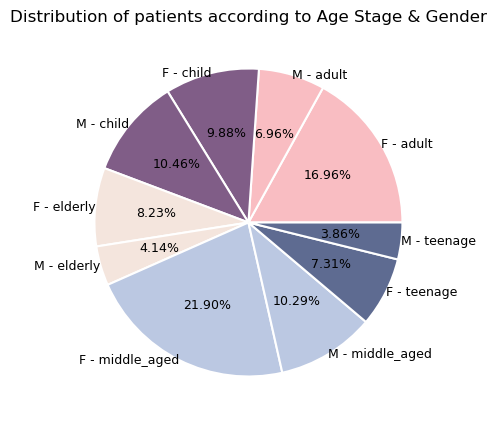

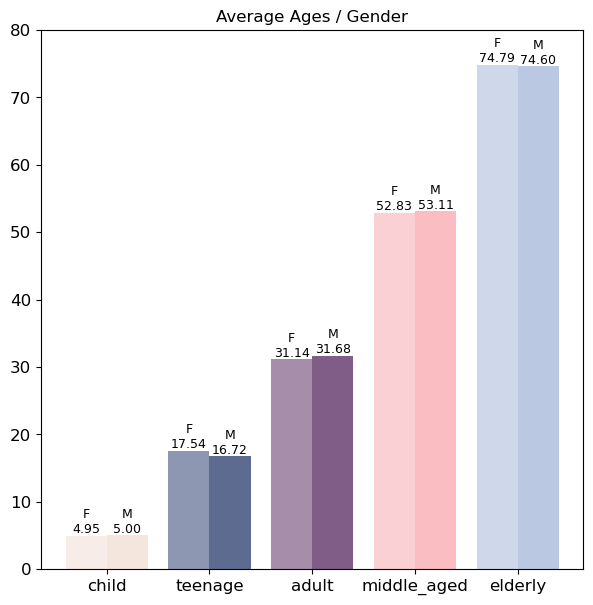

In [56]:
# Visualizing counts & averages of age_stages when classified by gender:
x=df.groupby(['age_stages','gender']).patient_id.nunique()
plt.subplots(figsize = (5,5))
plt.pie(x,labels = count_stages_gender.gender +" - "+ count_stages_gender.age_stages,  
        colors= ['#f9bdc2','#f9bdc2','#805d87','#805d87','#f4e5dd','#f4e5dd','#bbc8e2','#bbc8e2','#5e6b91','#5e6b91'], 
        autopct='%1.2f%%',labeldistance=1,pctdistance=.6,textprops={'fontsize': 9},
        wedgeprops={"linewidth": 1.5, "edgecolor": "white"} )
plt.title('Distribution of patients according to Age Stage & Gender',fontsize =12)
plt.show();

stage=avg_age_gender.sort_values('average_age').age_stages.unique().tolist()
avg = avg_age_gender.sort_values('average_age').gender.tolist()
gender_f=avg_age_gender.sort_values('average_age').query('gender=="F"').average_age.tolist()
gender_m=avg_age_gender.sort_values('average_age').query('gender=="M"').average_age.tolist()
width=.4
x=np.arange(len(gender_f))
locations= x+width/2
plt.subplots(figsize = (7,7))
plt.bar(x,gender_f,width,color=['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha= .7)
plt.bar(x + width,gender_m,width,color=['#f4e5dd','#5e6b91','#805d87','#f9bdc2','#bbc8e2'], alpha= 1)
for i, v in enumerate(gender_f):
  plt.text(i,v, f"F\n{v:.2f}", ha='center', va='bottom',fontsize=9)
for i, v in enumerate(gender_m):
  plt.text(i+width,v, f"M\n{v:.2f}", ha='center', va='bottom',fontsize=9) 
plt.xticks(locations, stage,fontsize = 12, rotation = 0)
plt.yticks(np.arange(0,90,10),fontsize = 12)
plt.title('Average Ages / Gender', fontsize =12)
plt.show();

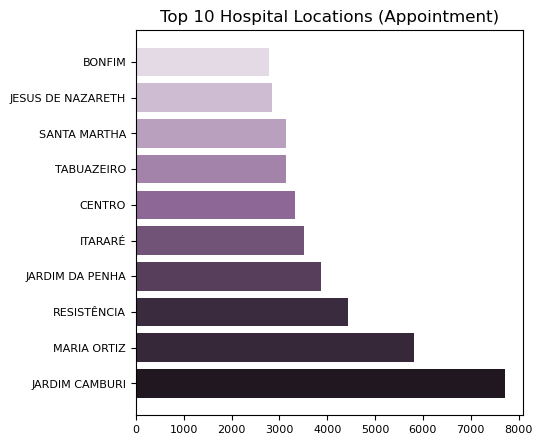

neighbourhood,count_appointment
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514
CENTRO,3334
TABUAZEIRO,3132
SANTA MARTHA,3131
JESUS DE NAZARETH,2853
BONFIM,2773


In [286]:
# Determining the top 10 hospital locations that had the highest appointment numbers:
appointment_neibourhood=df.groupby('neighbourhood').appoint_id.count().reset_index().rename(columns={'appoint_id':'count_appointment'})

neighbourhood_a=appointment_neibourhood.sort_values('count_appointment',ascending= False).head(10).neighbourhood.to_list()
Appoint_count=appointment_neibourhood.sort_values('count_appointment',ascending= False).head(10).count_appointment.to_list()
plt.subplots(figsize = (5,5))
plt.barh(neighbourhood_a,Appoint_count,color= ['#201721','#362739','#3b2b3e','#573f5b','#725378','#8d6795','#a383aa','#b9a0be','#cebdd2','#e4dae6'])
plt.title('Top 10 Hospital Locations (Appointment)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show();

top_10_appointment=appointment_neibourhood.sort_values('count_appointment',ascending= False).head(10).style.hide()
top_10_appointment


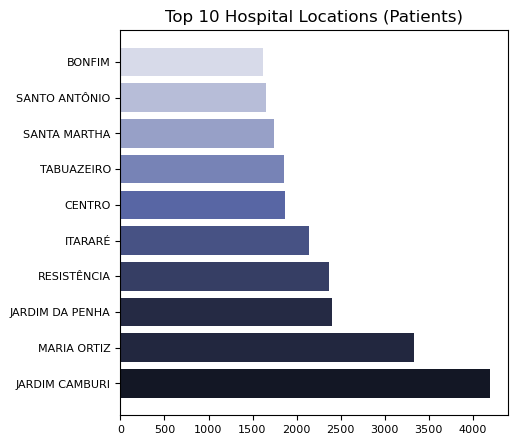

neighbourhood,count_patient
JARDIM CAMBURI,4192
MARIA ORTIZ,3336
JARDIM DA PENHA,2406
RESISTÊNCIA,2373
ITARARÉ,2136
CENTRO,1868
TABUAZEIRO,1856
SANTA MARTHA,1747
SANTO ANTÔNIO,1656
BONFIM,1615


In [284]:
# Determining the top 10 hospital locations that had the most recorded patients:
patient_neibourhood=df.groupby('neighbourhood').patient_id.nunique().reset_index().rename(columns={'patient_id':'count_patient'})

neighbourhood_p=patient_neibourhood.sort_values('count_patient',ascending= False).head(10).neighbourhood.to_list()
p_count=patient_neibourhood.sort_values('count_patient',ascending= False).head(10).count_patient.to_list()
plt.subplots(figsize = (5,5))
plt.barh(neighbourhood_p,p_count,color= ['#131725','#22273f','#252a44','#363e64','#475284','#5866a4','#7783b6','#97a0c7','#b7bdd8','#d7dae9'])
plt.title('Top 10 Hospital Locations (Patients)', fontsize = 12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show();

top_10_patient=patient_neibourhood.sort_values('count_patient',ascending= False).head(10).style.hide()
top_10_patient

In [59]:
# Exploring the Scholarship Column (Count of Patients With or Without Scholarships, Classified by Gender)
x=df.groupby(['scholarship','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':'patient_count'})
x

,scholarship,gender,patient_count
0,0,F,35345
1,0,M,21166
2,1,F,4701
3,1,M,1087


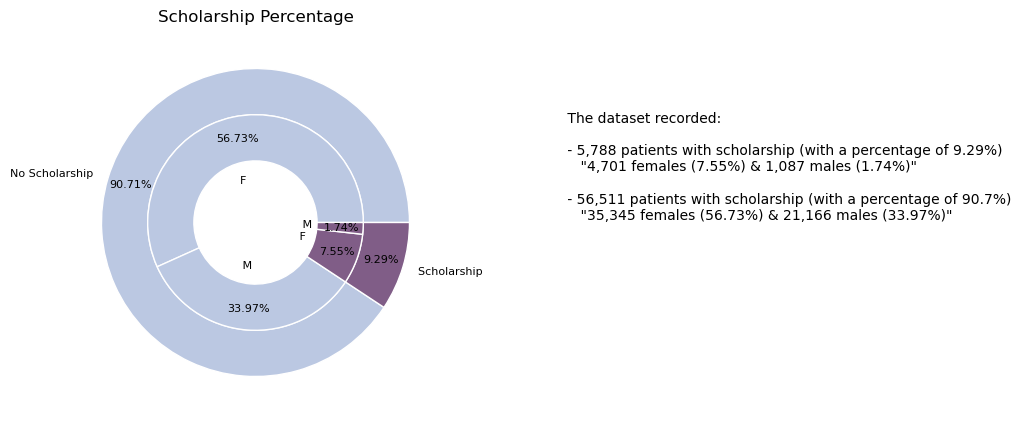

In [216]:
# Visualizing the Scholarship Column (Count of Patients With or Without Scholarships, Classified by Gender)
x=df.groupby(['scholarship','gender']).patient_id.nunique()
size = 0.3
label_s = 'No Scholarship','Scholarship '
label_g = 'F',' M',' F',' M'
text = ''' The dataset recorded:\n\n - 5,788 patients with scholarship (with a percentage of 9.29%)
    "4,701 females (7.55%) & 1,087 males (1.74%)"\n
 - 56,511 patients with scholarship (with a percentage of 90.7%)
    "35,345 females (56.73%) & 21,166 males (33.97%)" '''
plt.subplots(figsize = (5,5))
plt.pie(x.groupby('scholarship').sum(), radius=1, colors= ['#bbc8e2','#805d87'],labels = label_s,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

plt.pie(x, radius=1-size, colors= ['#bbc8e2','#bbc8e2','#805d87','#805d87'],labels=label_g,autopct='%1.2f%%',pctdistance=.8,
        labeldistance=.4,textprops={'fontsize': 8},wedgeprops=dict(width=size, edgecolor='w'))
plt.title('Scholarship Percentage')
plt.text(2,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [108]:
df.head(1)

,patient_id,appoint_id,gender,sched_day,appoint_day,date_diff,age_stages,age,neighbourhood,scholarship,htn,dm,aud,hcp,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,0,middle_aged,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [281]:
# Exploring patients with or without Hypertension (HTN):
htn_count=df.groupby(['age_stages','htn','gender']).patient_id.nunique().reset_index().rename(columns={'patient_id':"count_patient"})
htn_count['pct']=htn_count['count_patient']/htn_count['count_patient'].sum()
htn_count.style.format({'pct':'{:,.2%}'})

,age_stages,htn,gender,count_patient,pct
0,adult,0,F,9938,15.95%
1,adult,0,M,4097,6.58%
2,adult,1,F,625,1.00%
3,adult,1,M,237,0.38%
4,child,0,F,6154,9.88%
5,child,0,M,6512,10.45%
6,child,1,F,2,0.00%
7,child,1,M,7,0.01%
8,elderly,0,F,1969,3.16%
9,elderly,0,M,1145,1.84%


In [ ]:
# Visualizing Hypertension Column:
